In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
raw_data = pd.read_json('tvSeries_complete.json', orient='records')

In [4]:
print(raw_data.shape)
print(raw_data.head(10).keywords)

(8735, 12)
0    based-on-novel,dragon,politics,nudity,incest,q...
1    cancer,chemistry,methamphetamine,albuquerque-n...
2    government-conspiracy,1980s,friendship,telekin...
3    zombie,survival,post-apocalypse,based-on-comic...
4    friendship,friend,new-york-city,roommate,divor...
5    friendship,detective,modernized-setting,genius...
6    nerd,geek-culture,friend,roommate,best-friend,...
7    double-life,police-department,dark-secret,homi...
8    group-of-friends,friendship,sitcom,best-friend...
9    office,mockumentary,cringe-comedy,job,sitcom,w...
Name: keywords, dtype: object


### Bag of words feature representation for descriptive text

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

corpus = raw_data['keywords']
X = vectorizer.fit_transform(corpus)
X.shape

(8735, 14672)

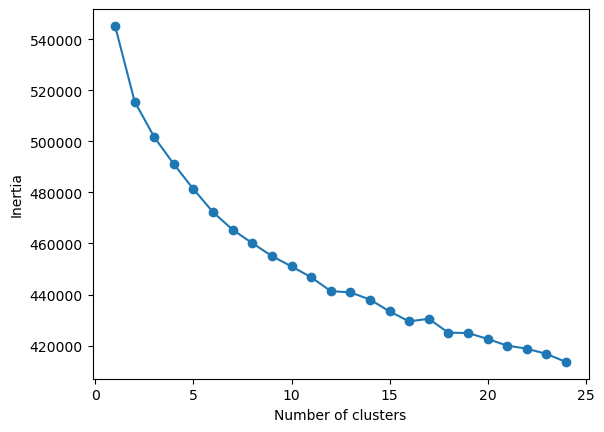

In [6]:
# first attempt at fitting K means to view change in Inertia
from sklearn.cluster import KMeans

# container to store inertia scores over iterations
distortions = []

# # fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 25):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

len(distortions)
    
# vizualize change in inertia
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### fit Kmeans

In [7]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=24, n_init=30)
km.fit(X)

KMeans(n_clusters=24, n_init=30)

### labels are named with integers and stored in the `labels_` attribute

In [8]:
km.labels_

array([9, 2, 0, ..., 1, 1, 1], dtype=int32)

### take a look at one of the cluster results

In [9]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 7:
        print(raw_data['keywords'][i])
        print('**********')

anthology,satire,dystopian-future,dystopia,psychological-thriller,dark-satire,social-satire,political-satire,news-satire,farce,pop-culture,anthology-series,technology,future,london-england,near-future,humanity,inhumanity,dehumanization,interpersonal-relationship,human-connection,privacy,alienation,disconnection,love,sexuality,work,unintended-consequences,color-in-title,techno-thriller,british-science-fiction,black-comedy,cult-tv,psychotronic-series,dark-comedy,web-series,two-word-title,cyber-thriller,dystopian-sci-fi,horror-host,uk-horror-host,uk-non-horror-host,non-horror-host,usa-non-horror-host,usa-horror-host,artificial-intelligence-sci-fi,social-sci-fi,philosophy,connection,female-rear-nudity,female-nudity,female-frontal-nudity
**********
sex-scene,king,hero,sword-and-shield,viking,brother-brother-relationship,homoerotic,legend,warrior,battle,mythological-character,valhalla,raid,saxon,monk,female-frontal-nudity,female-nudity,father-son-relationship,nudity,husband-wife-relationship

In [15]:
# create an instance of ViewClusteringResults to view results of final KMeans fit
from sklearn.cluster import KMeans

viz = ViewClusteringResults(labels_, km)

NameError: name 'ViewClusteringResults' is not defined

In [11]:
# view samples of product reviews, organized by KMeans cluster results
viz.view_cluster_samples(10)

NameError: name 'viz' is not defined

In [25]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [6, 9, 12, 15, 18]

For n_clusters = 6 The average silhouette_score is : 0.29605424728089


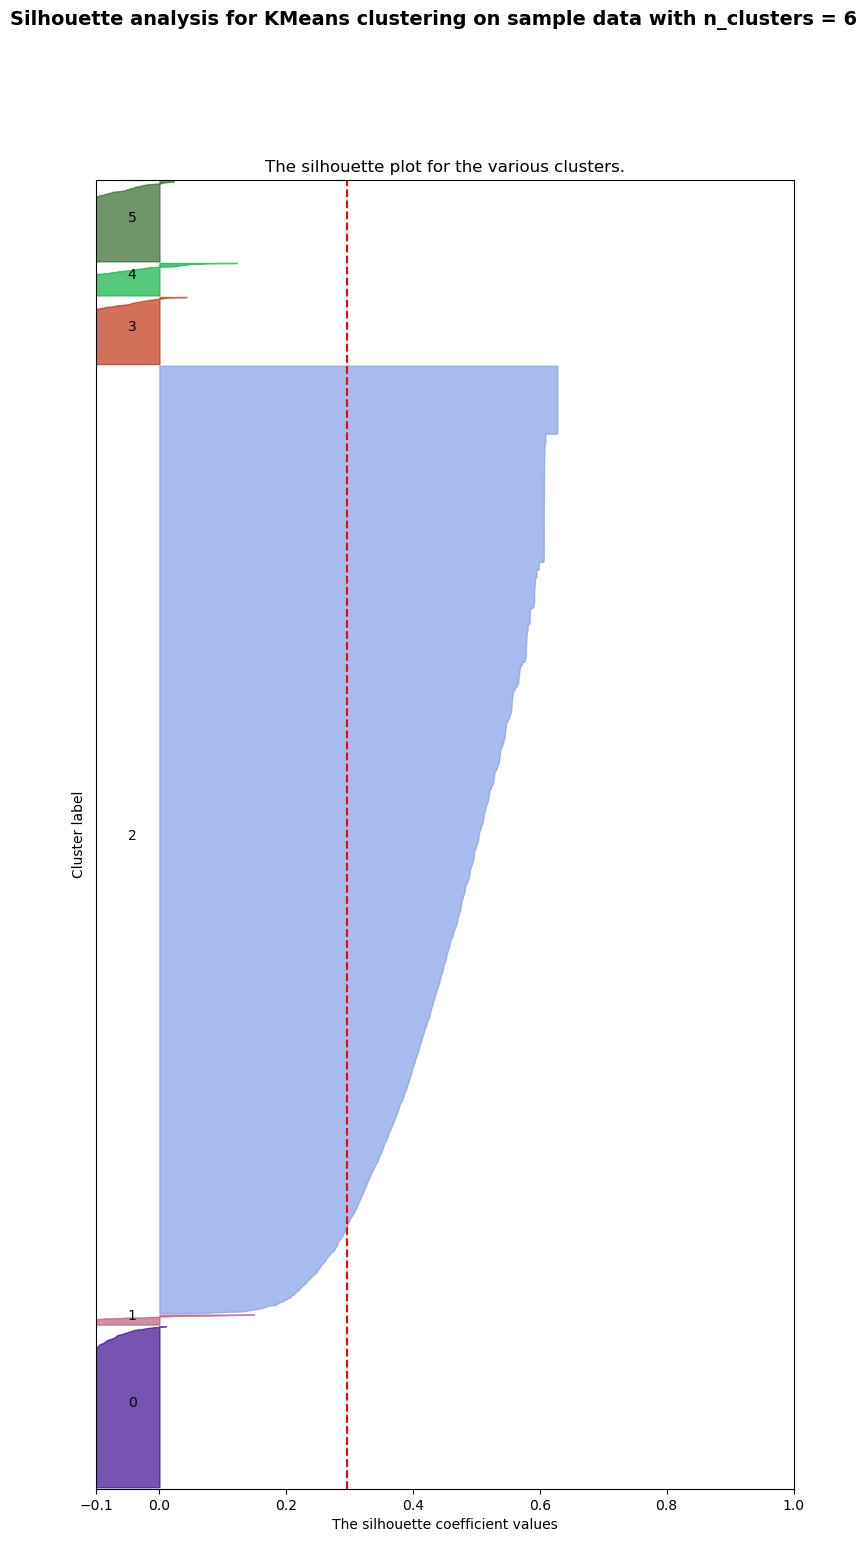

For n_clusters = 9 The average silhouette_score is : 0.25733332007913456


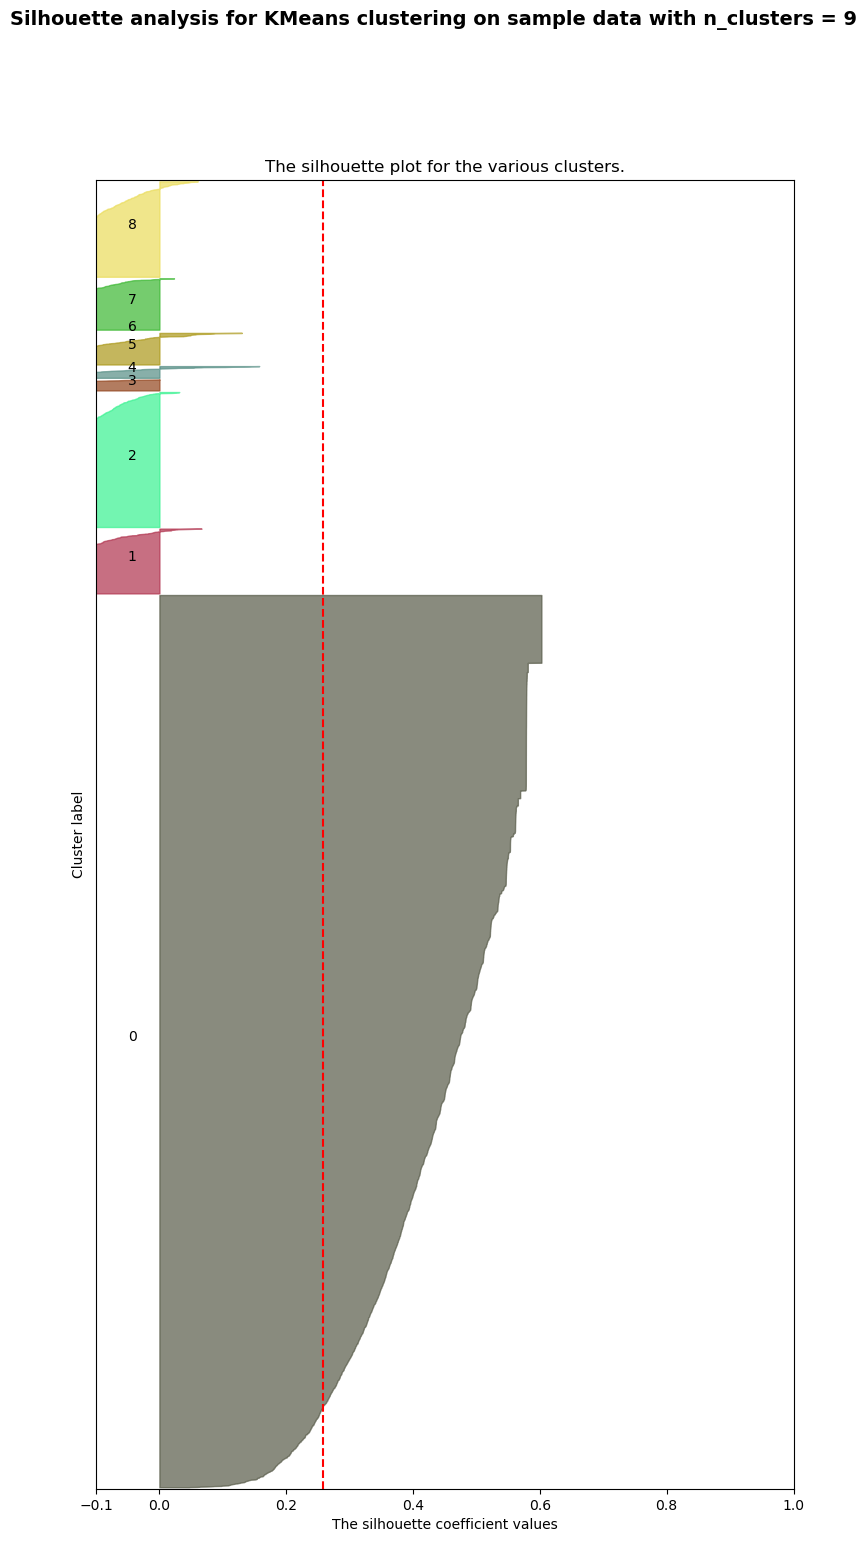

For n_clusters = 12 The average silhouette_score is : 0.2364944531054072


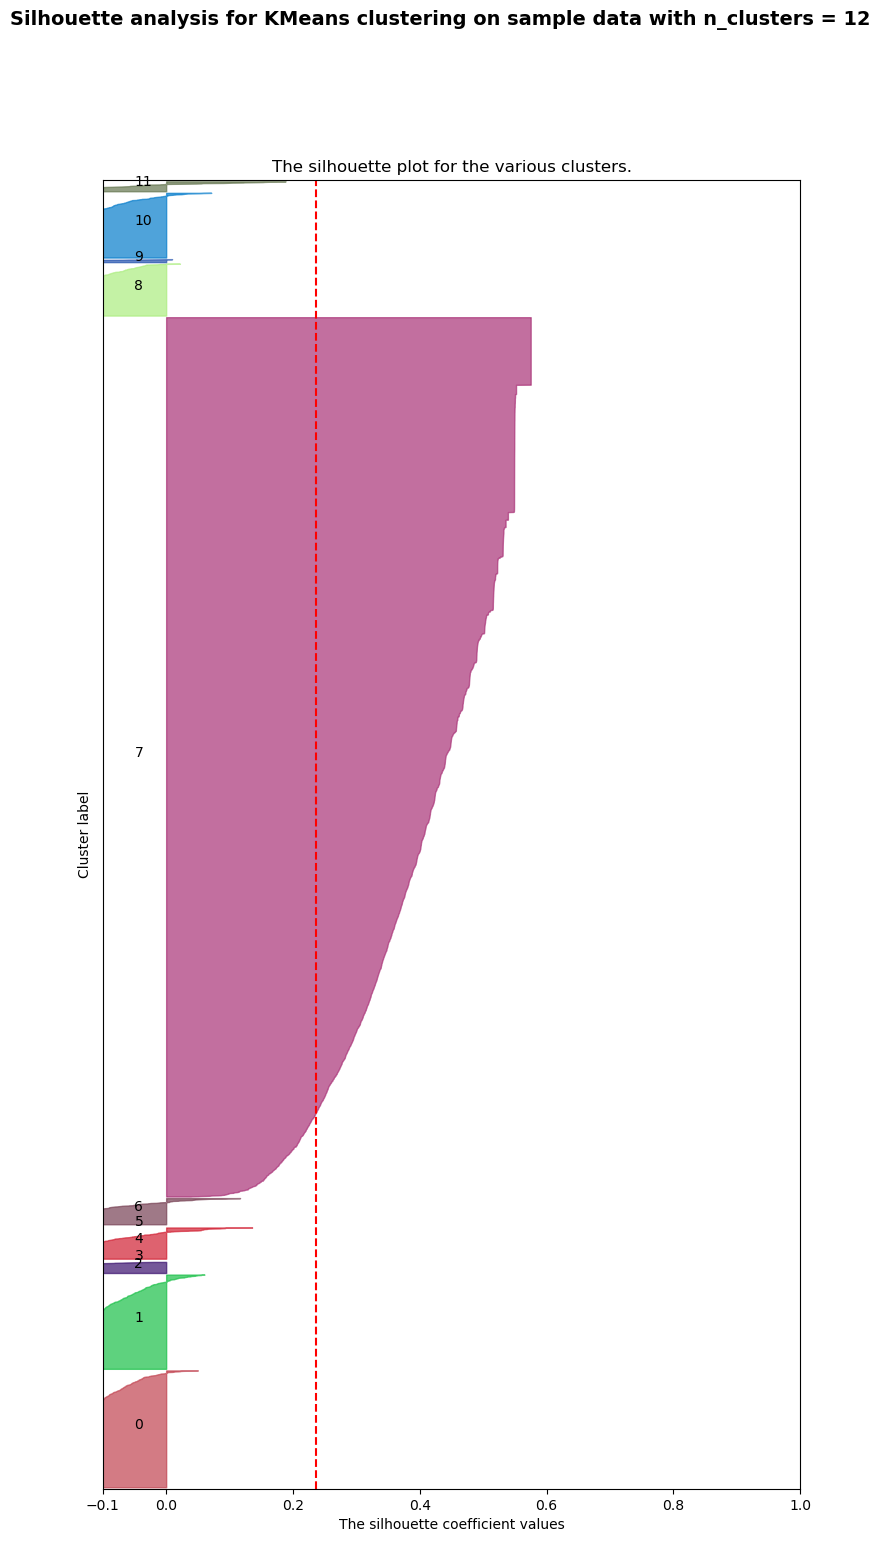

For n_clusters = 15 The average silhouette_score is : 0.22673285890906372


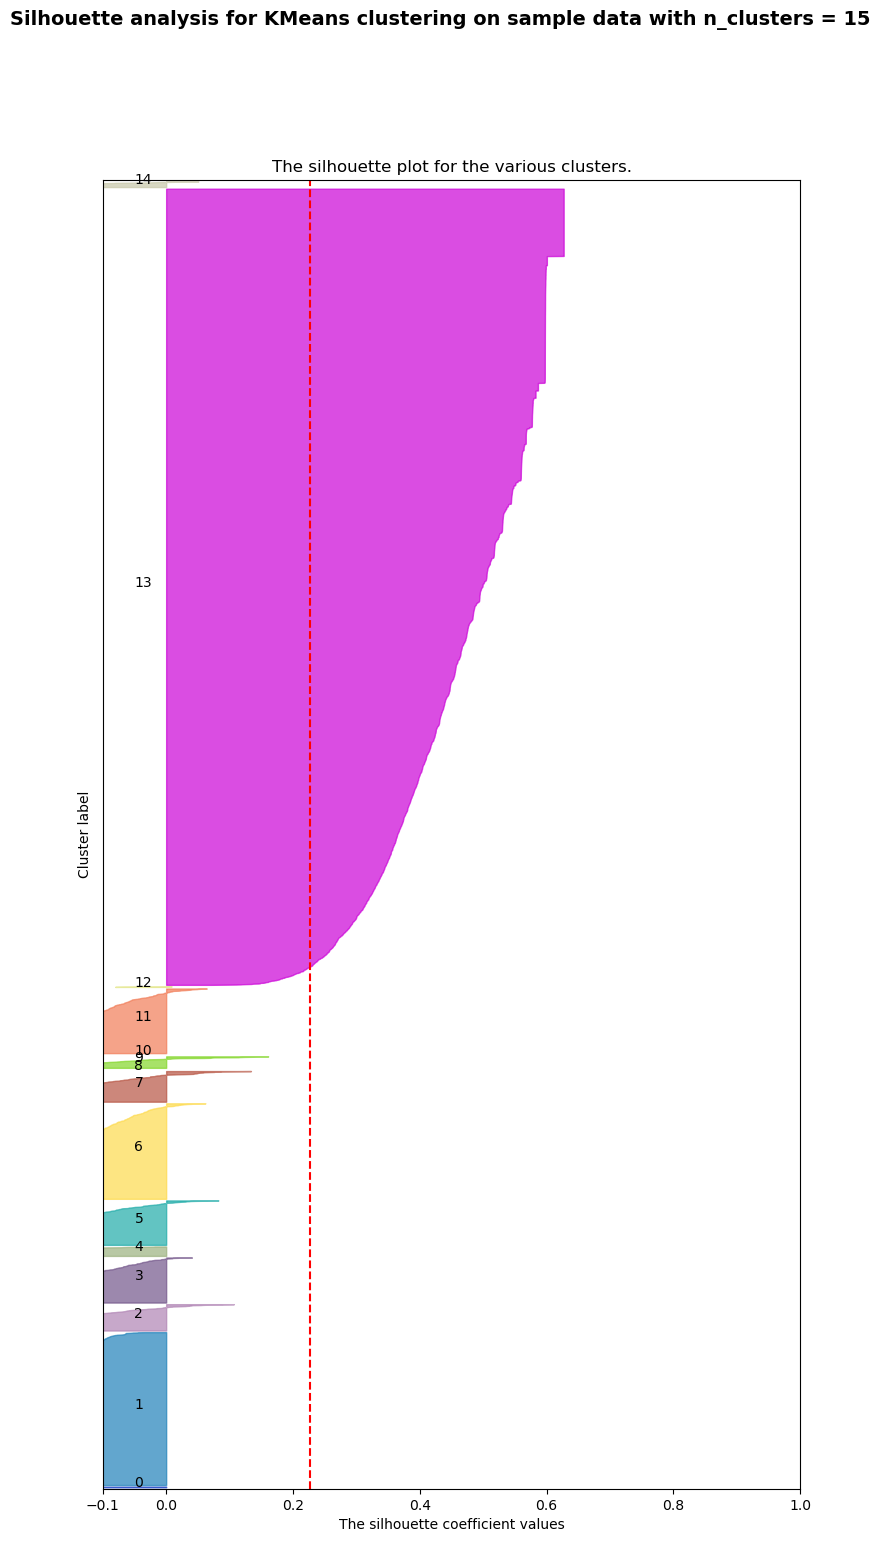

For n_clusters = 18 The average silhouette_score is : -0.004140128412653141


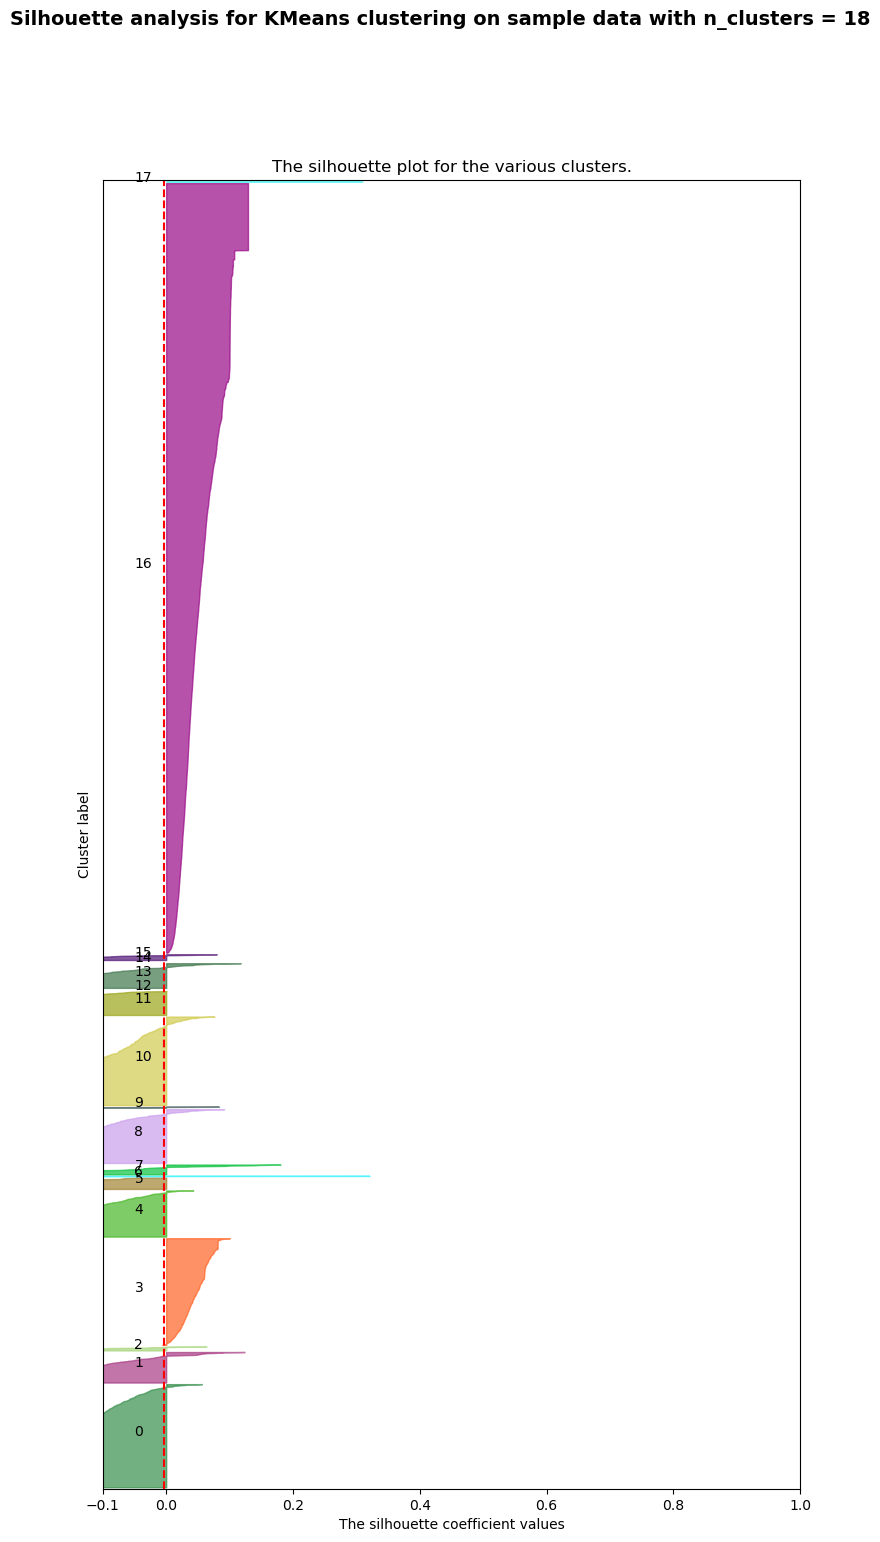

In [26]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.set_ylim([0, len(km.labels_) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()